In [66]:
import pandas as pd
import numpy as np
from keras.utils.np_utils import to_categorical

#Загрузим данные
df_train = pd.read_csv('adult.data', sep =', ')
df_valid = pd.read_csv('adult.test', sep =', ')
print('------------- data loaded -----------')
print(df_valid.dtypes)
print('----------')
print(df_train.dtypes)

D:\soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
D:\soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


------------- data loaded -----------
age     int64
wcl    object
wgt     int64
edu    object
edn     int64
mts    object
ocp    object
rls    object
rac    object
sex    object
cpg     int64
cpl     int64
hpw     int64
ctr    object
inc    object
dtype: object
----------
age     int64
wcl    object
wgt     int64
edu    object
edn     int64
mts    object
ocp    object
rls    object
rac    object
sex    object
cpg     int64
cpl     int64
hpw     int64
ctr    object
inc    object
dtype: object


In [67]:
from sklearn.preprocessing import LabelBinarizer

def replace_spaces(arr) :
    for i in range(0, len(arr)):
        el = arr[i]
        if (isinstance(el, str)):
            arr[i] = el.replace(' ', '').replace('.', '').upper()
    return arr

def tranform_dtype(df):
    columns = df.select_dtypes(['object']).columns
    for i in columns:
        df[i] = replace_spaces(df[i].to_numpy())
        df[i] = df[i].astype('category')
    df[columns] = df[columns].apply(lambda x: x.cat.codes)

def tranform_dtype1(df):
    columns = df.select_dtypes(['object']).columns
    for i in columns:
        df[i] = replace_spaces(df[i].to_numpy())
        if len(df.groupby([i]).size()) > 2:
         df = pd.get_dummies(df, prefix=[i], columns=[i])
    return pd.get_dummies(df, drop_first=True)

# print('------------Prepare DF binarization -----------------------')
# df_valid = tranform_dtype1(df_valid)
# df_valid['ctr_HOLAND-NETHERLANDS'] = np.zeros(len(df_valid['ctr_LAOS']))
# df_train = tranform_dtype1(df_train)
# df_valid = df_valid[df_train.columns]
print('------------Prepare DF categorization -----------------------')
tranform_dtype(df_valid)
tranform_dtype(df_train)

print(df_valid)
print(df_train)

------------Prepare DF categorization -----------------------
       age  wcl     wgt  edu  edn  mts  ocp  rls  rac  sex   cpg  cpl  hpw  \
0       25    4  226802    1    7    4    7    3    2    1     0    0   40   
1       38    4   89814   11    9    2    5    0    4    1     0    0   50   
2       28    2  336951    7   12    2   11    0    4    1     0    0   40   
3       44    4  160323   15   10    2    7    0    2    1  7688    0   40   
4       18    0  103497   15   10    4    0    3    4    0     0    0   30   
...    ...  ...     ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...   
16276   39    4  215419    9   13    0   10    1    4    0     0    0   36   
16277   64    0  321403   11    9    6    0    2    2    1     0    0   40   
16278   38    4  374983    9   13    2   10    0    4    1     0    0   50   
16279   44    4   83891    9   13    0    1    3    1    1  5455    0   40   
16280   35    5  182148    9   13    2    4    0    4    1     0    0   60   

 

In [80]:
data_valid = df_valid.to_numpy()
data_train = df_train.to_numpy()


train_label = to_categorical(data_train[:, -1])
train_sample = data_train[:, :-1]
# train_sample = train_sample.reshape(len(train_sample), train_sample.shape[1], 1)

valid_label = to_categorical(data_valid[:, -1])
valid_sample = data_valid[:,:-1]
# valid_sample = valid_sample.reshape(len(valid_sample), valid_sample.shape[1], 1)
print('Train labels shape = ', train_label.shape)
print('Train samples shape = ', train_sample.shape)

print('Validation labels shape = ', valid_label.shape)
print('Validation samples shape = ', valid_sample.shape)


Train labels shape =  (32561, 2)
Train samples shape =  (32561, 14)
Validation labels shape =  (16281, 2)
Validation samples shape =  (16281, 14)


In [91]:
from tensorflow.keras import models
from tensorflow.keras import layers

print('------- Prepare Model -----------------')
actv = 'relu'
model = models.Sequential()
# model.add(layers.Conv1D(14,6,activation='relu', input_shape=(train_sample.shape[1], 1)))
# model.add(layers.MaxPool1D(pool_size=3, strides=(2), padding="same"))
# model.add(layers.Conv1D(32,3,activation='relu'))
# model.add(layers.MaxPool1D(pool_size=3, strides=(2), padding="same"))
# model.add(layers.Conv1D(16,2,activation='relu'))
# model.add(layers.MaxPool1D(pool_size=3, strides=(2), padding="same"))
# model.add(layers.Flatten())
model.add(layers.Dense(64, activation='sigmoid', input_shape=(train_sample.shape[1],)))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(32, activation='sigmoid'))
model.add(layers.Dense(32, activation='sigmoid'))
model.add(layers.Dense(8,  activation='sigmoid'))
model.add(layers.Dense(2,  activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(x=train_sample,
                    y=train_label,
                    epochs=10,
                    batch_size=256,
                    validation_data = (valid_sample, valid_label)
                    )

------- Prepare Model -----------------
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 64)                960       
_________________________________________________________________
dense_88 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_89 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_90 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_91 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_92 (Dense)             (None, 2)                 18        
Total params: 8,538
Trainable params: 8,538
Non-trainable params: 0
___________

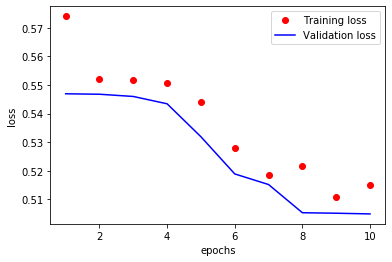

In [92]:
import matplotlib.pyplot as plt

hist_dcit = history.history
loss = hist_dcit['loss']
val_loss = hist_dcit['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo',color='r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

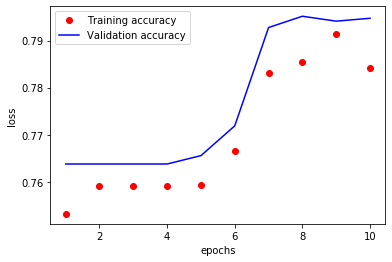

In [93]:
acc = hist_dcit['accuracy']
val_acc = hist_dcit['val_accuracy']
plt.plot(epochs, acc, 'bo',color='r',label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
